# RIT IMGS 211: Probability and Statistics for Imaging Scientists
### Created by Gabriel J. Diaz

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/new_RIT_full_RGB_hor_k_0.png?export=view&id=XXX)


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Why are zscores useful?

Z-scores allow you to understand where a value fits within a distribution.

The equation to convert from X values to Zscores
## $z=\frac{x-\mu}{\sigma}$

To help you understand, let's visualize some distributions, convert them to zscores, and then convert them back.


<!-- <h2><center>$z=\frac{x-\mu}{\sigma}$</center></h2> -->



## Let us define our frequency distributions.

In [2]:
samp1 = np.random.normal(5,1,1001)
samp2 = np.random.normal(17,3,1001)
samp3 = np.random.normal(10,1.4,1001)

## Plot the relative frequency histograms.

Let's pretend that X is the number of targets identified in an image using three different algorithms.

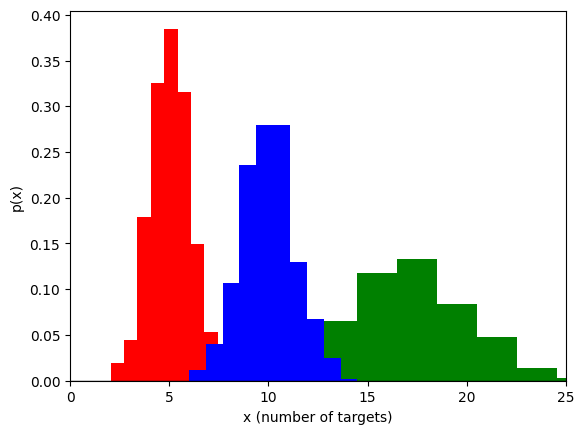

In [3]:
xVals = np.linspace(-10, 25, 3001)

plt.hist(samp1,color='r',density=True)
plt.hist(samp2,color='g',density=True)
plt.hist(samp3,color='b',density=True)

plt.xlabel('x (number of targets)')
plt.ylabel('p(x)')
plt.axhline(color='black', linewidth=0.25)
plt.axvline(color='k', lw=0.25)
plt.xlim([0,25])
plt.show()


### Use norm.fit() to estimate the mean and std.

We can also then add some solid lines to represent the continuous distributions fit to the underlying data.

In [4]:
from scipy.stats import norm

mu1, std1 = norm.fit(samp1)
pvals1 = norm.pdf(xVals, mu1, std1)

mu2, std2 = norm.fit(samp2)
pvals2 = norm.pdf(xVals, mu2, std2)

mu3, std3 = norm.fit(samp3)
pvals3 = norm.pdf(xVals, mu3, std3)

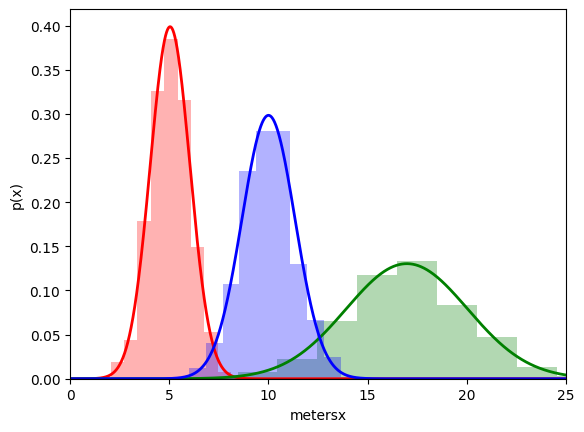

S1 mean (std): 5.04 (1.00)
S2 mean (std): 16.98 (3.06)
S3 mean (std): 10.00 (1.34)


In [5]:
plt.hist(samp1,color='r',density=True,alpha=0.3)
plt.plot(xVals, pvals1, 'r', linewidth=2)

plt.hist(samp2,color='g',density=True,alpha=0.3)
plt.plot(xVals, pvals2, 'g', linewidth=2)

plt.hist(samp3,color='b',density=True,alpha=0.3)
plt.plot(xVals, pvals3, 'b', linewidth=2)

plt.xlabel('metersx')
plt.ylabel('p(x)')
plt.axhline(color='black', linewidth=0.25)
plt.axvline(color='k', lw=0.25)
plt.xlim([0,25])
plt.show()

print(f'S1 mean (std): {np.mean(samp1):.2f} ({np.std(samp1):.2f})')
print(f'S2 mean (std): {np.mean(samp2):.2f} ({np.std(samp2):.2f})')
print(f'S3 mean (std): {np.mean(samp3):.2f} ({np.std(samp3):.2f})')

## Convert x values into z scores

In [6]:
samp1_z = (samp1-mu1) / std1
samp2_z = (samp2-mu2) / std2
samp3_z = (samp3-mu3) / std3

## Plot transformed distributions in zscore space

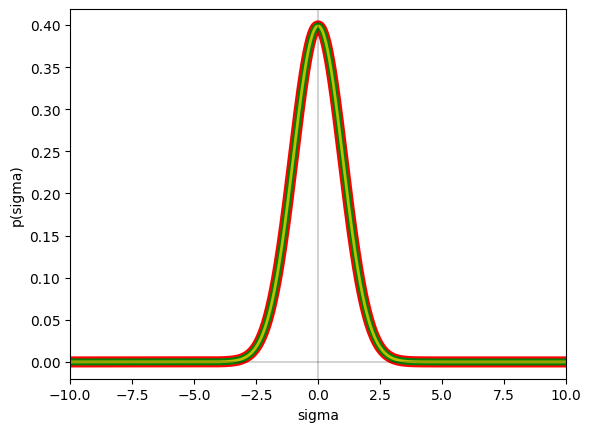

S1 mean (std): 5.04 (1.00)
S2 mean (std): 16.98 (3.06)
S3 mean (std): 10.00 (1.34)


In [7]:
from scipy.stats import norm

# plt.hist(samp1_z,color='r',density=True,alpha=0.3)
mu, std = norm.fit(samp1_z)
pvals1 = norm.pdf(xVals, mu, std)
plt.plot(xVals, pvals1, 'r', linewidth=8)

# plt.hist(samp2_z,color='g',density=True,alpha=0.3)
mu, std = norm.fit(samp2_z)
pvals1 = norm.pdf(xVals, mu, std)
plt.plot(xVals, pvals1, 'g', linewidth=5)

# plt.hist(samp3_z,color='b',density=True,alpha=0.3)
mu, std = norm.fit(samp3_z)
pvals1 = norm.pdf(xVals, mu, std)
plt.plot(xVals, pvals1, 'y', linewidth=2)

plt.xlabel('sigma')
plt.ylabel('p(sigma)')
plt.axhline(color='black', linewidth=0.25)
plt.axvline(color='k', lw=0.25)
plt.xlim([-10,10])
plt.show()

print(f'S1 mean (std): {np.mean(samp1):.2f} ({np.std(samp1):.2f})')
print(f'S2 mean (std): {np.mean(samp2):.2f} ({np.std(samp2):.2f})')
print(f'S3 mean (std): {np.mean(samp3):.2f} ({np.std(samp3):.2f})')

# You can also convert from Z back to its original x values (in its original units)

... assuming you can estimate mu and sigma in its original units (i.e., of x).

Below, we calculate x values from zscores using the saved mu and sigma

In [8]:
samp1_unZ = (samp1_z * std1) + mu1
samp2_unZ = (samp2_z * std2) + mu2
samp3_unZ = (samp3_z * std3) + mu3

mu1, std1 = norm.fit(samp1_unZ)
pvals1 = norm.pdf(xVals, mu1, std1)

mu2, std2 = norm.fit(samp2_unZ)
pvals2 = norm.pdf(xVals, mu2, std2)

mu3, std3 = norm.fit(samp3_unZ)
pvals3 = norm.pdf(xVals, mu3, std3)


## Plot our distributions again.

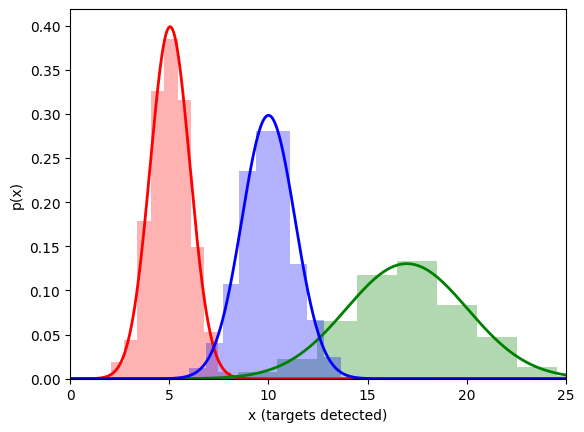

S1 mean (std): 5.04 (1.00)
S2 mean (std): 16.98 (3.06)
S3 mean (std): 10.00 (1.34)


In [9]:
from scipy.stats import norm

plt.hist(samp1_unZ,color='r',density=True,alpha=0.3)
plt.plot(xVals, pvals1, 'r', linewidth=2)

plt.hist(samp2_unZ,color='g',density=True,alpha=0.3)
plt.plot(xVals, pvals2, 'g', linewidth=2)

plt.hist(samp3_unZ,color='b',density=True,alpha=0.3)
plt.plot(xVals, pvals3, 'b', linewidth=2)

plt.xlabel('x (targets detected)')
plt.ylabel('p(x)')
plt.axhline(color='black', linewidth=0.25)
plt.axvline(color='k', lw=0.25)
plt.xlim([0,25])
plt.show()

print(f'S1 mean (std): {np.mean(samp1):.2f} ({np.std(samp1):.2f})')
print(f'S2 mean (std): {np.mean(samp2):.2f} ({np.std(samp2):.2f})')
print(f'S3 mean (std): {np.mean(samp3):.2f} ({np.std(samp3):.2f})')

## Convert sample values to zscores using stats.zscore and stats.zmap

In [10]:
from scipy import stats

In [12]:
mu = 5
sigma = 1
samp = np.random.normal(mu,sigma,101)
samp

array([4.79562669, 5.42126721, 5.75789729, 4.72100303, 4.08135848,
       5.5723262 , 5.0207807 , 4.96591243, 4.68866132, 4.82704291,
       6.73866852, 5.35370407, 7.09102185, 5.68377499, 4.4725235 ,
       5.28376111, 3.70704669, 4.08640163, 3.92742396, 4.99027138,
       5.21412711, 4.7212911 , 5.29618266, 3.12992511, 5.24483797,
       4.91679819, 6.13063778, 5.51438069, 5.93440444, 2.71498815,
       5.74540984, 4.97455481, 5.07438445, 5.6965569 , 3.00217804,
       6.41178681, 4.6225803 , 5.58946975, 6.2272949 , 4.76271625,
       5.68982619, 5.17936439, 5.32054219, 5.62869928, 5.04060206,
       5.37734933, 4.11700748, 4.39408938, 6.44683228, 4.29598268,
       4.96488093, 3.8863301 , 3.80452714, 5.38228221, 6.605143  ,
       7.43588628, 4.7169656 , 6.18599491, 6.495821  , 3.7960331 ,
       6.4393477 , 3.95384216, 6.03502402, 4.44827996, 3.9119768 ,
       3.52932698, 4.73960475, 3.60426013, 4.37857654, 4.10060132,
       5.83825122, 5.97661416, 5.0046882 , 5.42139026, 4.50993

### First, manually.
Print the first 10 values

In [29]:
manual_z = (samp-np.mean(samp)) / np.std(samp)
manual_z[1:10]

array([ 0.36792844,  0.71092139, -0.34557193, -0.99730685,  0.52184269,
       -0.04012795, -0.09603332, -0.37852496, -0.23752771])

### Now, using stats.zscore.
Print the first ten values.

In [30]:
stats.zscore(manual_z)[:10]

array([-0.26953776,  0.36792844,  0.71092139, -0.34557193, -0.99730685,
        0.52184269, -0.04012795, -0.09603332, -0.37852496, -0.23752771])

## Zmap allows me to map values onto the distribution implied by another sample.

If I zmap onto samp2, I get the same results as if I use zscore.
That's because the mean and std are calculated from sample distribution, sample2.

In [31]:
samp2_zscores = stats.zscore(samp2)
samp2_zscores[:10]

array([ 0.80264005, -0.2282745 , -0.34997595,  0.77197204,  0.24899223,
        0.3377999 ,  0.12611447,  0.69809228,  1.02634123,  0.61926408])

In [34]:
samp2_zmapped_to_samp2 = stats.zmap(samp2,samp2)

samp2_zmapped_to_samp2[:10]

array([ 0.80264005, -0.2282745 , -0.34997595,  0.77197204,  0.24899223,
        0.3377999 ,  0.12611447,  0.69809228,  1.02634123,  0.61926408])

Here, I calculate the zscores of samp2 using the mean and std of samp3

In [37]:
samp2_zmapped_to_samp3 = stats.zmap(samp2,samp3)
samp2_zmapped_to_samp3[:10]

array([7.05250603, 4.69252397, 4.41392353, 6.98230044, 5.78508873,
       5.98838833, 5.50379548, 6.81317401, 7.56460547, 6.63271953])